# Correlating Possession Ratio to Score Ratio

## (Through AFL Round 19, 2021 Season)

In [73]:
import pandas as pd


In [75]:
#get data from csv
AFL_PbP = pd.read_csv('AFL Play by play thre r19.csv')

In [76]:
#let's take a look
pd.set_option('display.max_rows', 30)
AFL_PbP

,Match_id,Player_id,Round,Home,Away,Venue,First_name,Last_name,Team,Team_status,Quarter,Time,Stat
0,CD_M20210140101,CD_I298174,1,Richmond,Carlton,MCG,Toby,Nankervis,Richmond,home,1,00:03,Hitout
1,CD_M20210140101,CD_I260930,1,Richmond,Carlton,MCG,Shane,Edwards,Richmond,home,1,00:10,Kick
2,CD_M20210140101,CD_I260930,1,Richmond,Carlton,MCG,Shane,Edwards,Richmond,home,1,00:10,Disposal
3,CD_M20210140101,CD_I260930,1,Richmond,Carlton,MCG,Shane,Edwards,Richmond,home,1,00:11,Centre Clearance
4,CD_M20210140101,CD_I290627,1,Richmond,Carlton,MCG,Dion,Prestia,Richmond,home,1,00:13,Tackle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
683038,CD_M20210141909,CD_I250362,19,Adelaide Crows,Hawthorn,Marvel Stadium,David,Mackay,Adelaide Crows,home,4,27:21,Effective Kick
683039,CD_M20210141909,CD_I250362,19,Adelaide Crows,Hawthorn,Marvel Stadium,David,Mackay,Adelaide Crows,home,4,27:21,Disposal
683040,CD_M20210141909,CD_I250362,19,Adelaide Crows,Hawthorn,Marvel Stadium,David,Mackay,Adelaide Crows,home,4,27:21,Effective Disposal
683041,CD_M20210141909,CD_I1005199,19,Adelaide Crows,Hawthorn,Marvel Stadium,Elliott,Himmelberg,Adelaide Crows,home,4,28:26,Shot At Goal


In [77]:
#check out unique values for 'Stat'
set(AFL_PbP['Stat'].to_list())

{'Behind',
 'Centre Clearance',
 'Clanger',
 'Contested Mark',
 'Contested Possession',
 'Disposal',
 'Effective Disposal',
 'Effective Kick',
 'F 50 Mark',
 'F 50 Tackle',
 'Free Against',
 'Free For',
 'Goal',
 'Goal Assist',
 'Ground Ball Get',
 'Handball',
 'Hitout',
 'Hitout To Advantage',
 'Intercept Mark',
 'Kick',
 'Kick In',
 'Mark',
 'Mark On Lead',
 'One Percenter',
 'Poss Gain',
 'Rebound 50',
 'Running Bounce',
 'Score Launch',
 'Shot At Goal',
 'Spoil',
 'Stoppage Clearance',
 'Tackle',
 'Turnover',
 'Uncontested Possession'}

In [78]:
#drop unnecessary rows
poss_per = AFL_PbP[['Match_id', 'Home', 'Away', 'Team_status', 'Quarter', 'Stat']].copy()
poss_per.head()

,Match_id,Home,Away,Team_status,Quarter,Stat
0,CD_M20210140101,Richmond,Carlton,home,1,Hitout
1,CD_M20210140101,Richmond,Carlton,home,1,Kick
2,CD_M20210140101,Richmond,Carlton,home,1,Disposal
3,CD_M20210140101,Richmond,Carlton,home,1,Centre Clearance
4,CD_M20210140101,Richmond,Carlton,home,1,Tackle


In [79]:
#add a 'Possession' column to determine who has possession and a 'Poss_id' column to give each possession an id

#turning the dataframe into a dictionary makes this happen much faster

poss_per_game_dict = poss_per.to_dict('records')

poss = None
quarter = 0
Poss_list = []
Poss_id_list = []
n=0
for row in poss_per_game_dict:
    if row['Quarter'] != quarter:
        poss = None
        Poss_id_list.append(None)
        quarter = row['Quarter']
        row['Possession'] = poss
        Poss_list.append(poss)
    else:
    
        if row['Stat'] in ['Poss Gain', 'Centre Clearance', 'Stoppage Clearance', 'Kick In', 'Contested Possession']:
            poss = row['Team_status']
            row['Possession'] = poss
            Poss_list.append(poss)

        elif row['Stat'] in ['Hitout', 'Hitout To Advantage']:
            poss = None
            row['Possession'] = poss
            Poss_list.append(poss)
            
        elif row['Stat'] == 'Turnover':
            if poss == 'home':
                poss = 'away'
            else:
                poss = 'home'
            row['Possession'] = poss
            Poss_list.append(poss)
            
        elif row['Stat'] not in ['Hitout', 'Hitout To Advantage', 'Poss Gain', 'Centre Clearance', 'Stoppage Clearance', 'Kick In', 'Contested Possession', 'Goal', 'Behind', 'Turnover']:
            row['Possession'] = poss
            Poss_list.append(poss)
        
        elif row['Stat'] in ['Goal', 'Behind']:
            row['Possession'] = poss
            Poss_list.append(poss)
            poss = None

#possession counter        
        
        if row['Possession'] == None:
            Poss_id_list.append(None)

        elif row['Possession'] == Poss_list[-2] or row['Possession'] == 'score':
            Poss_id_list.append(Poss_id_list[-1])
        else:
            n+=1
            Poss_id_list.append(n)


poss_per = pd.DataFrame(poss_per_game_dict)          
            

poss_per['Poss_id'] = Poss_id_list



In [80]:
pd.set_option('display.max_rows', None)
poss_per.head(50)


,Match_id,Home,Away,Team_status,Quarter,Stat,Possession,Poss_id
0,CD_M20210140101,Richmond,Carlton,home,1,Hitout,None,NaN
1,CD_M20210140101,Richmond,Carlton,home,1,Kick,None,NaN
2,CD_M20210140101,Richmond,Carlton,home,1,Disposal,None,NaN
3,CD_M20210140101,Richmond,Carlton,home,1,Centre Clearance,home,1.0
4,CD_M20210140101,Richmond,Carlton,home,1,Tackle,home,1.0
5,CD_M20210140101,Richmond,Carlton,home,1,Hitout,None,NaN
6,CD_M20210140101,Richmond,Carlton,home,1,Hitout To Advantage,None,NaN
7,CD_M20210140101,Richmond,Carlton,away,1,Free Against,None,NaN
8,CD_M20210140101,Richmond,Carlton,home,1,Contested Possession,home,2.0
9,CD_M20210140101,Richmond,Carlton,home,1,Free For,home,2.0


In [81]:
#group by possessions with the intent of later counting these possessions
#counted the stats because I had to aggregate something
poss_per = poss_per.groupby(['Match_id', 'Home', 'Away', 'Poss_id', 'Possession'], as_index = False)['Stat'].count()

In [82]:
poss_per.head()

,Match_id,Home,Away,Poss_id,Possession,Stat
0,CD_M20210140101,Richmond,Carlton,1.0,home,2
1,CD_M20210140101,Richmond,Carlton,2.0,home,19
2,CD_M20210140101,Richmond,Carlton,3.0,away,9
3,CD_M20210140101,Richmond,Carlton,4.0,away,3
4,CD_M20210140101,Richmond,Carlton,5.0,home,22


In [83]:
#group by team and game to count the possessions
poss_per_game = poss_per.groupby(['Match_id', 'Home', 'Away', 'Possession'], as_index = False)['Poss_id'].count()

In [84]:
poss_per_game.head(10)

,Match_id,Home,Away,Possession,Poss_id
0,CD_M20210140101,Richmond,Carlton,away,134
1,CD_M20210140101,Richmond,Carlton,home,143
2,CD_M20210140102,Collingwood,Western Bulldogs,away,142
3,CD_M20210140102,Collingwood,Western Bulldogs,home,131
4,CD_M20210140103,Melbourne,Fremantle,away,134
5,CD_M20210140103,Melbourne,Fremantle,home,136
6,CD_M20210140104,Adelaide Crows,Geelong Cats,away,121
7,CD_M20210140104,Adelaide Crows,Geelong Cats,home,121
8,CD_M20210140105,Essendon,Hawthorn,away,137
9,CD_M20210140105,Essendon,Hawthorn,home,133


In [83]:
len(poss_per_game)

312

In [85]:
#a couple steps to create only one row for every game with possession counts for each team

for ind, row in poss_per_game.iterrows():
    if row['Possession'] == 'home':
        poss_per_game.loc[ind, 'Home_poss_count'] = poss_per_game.loc[ind, 'Poss_id']
        poss_per_game.loc[ind, 'Away_poss_count'] = 0
    else:
        poss_per_game.loc[ind, 'Away_poss_count'] = poss_per_game.loc[ind, 'Poss_id']
        poss_per_game.loc[ind, 'Home_poss_count'] = 0
        
    
    

In [86]:
poss_per_game.head(10)

,Match_id,Home,Away,Possession,Poss_id,Away_poss_count,Home_poss_count
0,CD_M20210140101,Richmond,Carlton,away,134,134.0,0.0
1,CD_M20210140101,Richmond,Carlton,home,143,0.0,143.0
2,CD_M20210140102,Collingwood,Western Bulldogs,away,142,142.0,0.0
3,CD_M20210140102,Collingwood,Western Bulldogs,home,131,0.0,131.0
4,CD_M20210140103,Melbourne,Fremantle,away,134,134.0,0.0
5,CD_M20210140103,Melbourne,Fremantle,home,136,0.0,136.0
6,CD_M20210140104,Adelaide Crows,Geelong Cats,away,121,121.0,0.0
7,CD_M20210140104,Adelaide Crows,Geelong Cats,home,121,0.0,121.0
8,CD_M20210140105,Essendon,Hawthorn,away,137,137.0,0.0
9,CD_M20210140105,Essendon,Hawthorn,home,133,0.0,133.0


In [87]:
poss_per_game = poss_per_game.groupby(['Home', 'Away'], as_index = False)['Home_poss_count', 'Away_poss_count'].sum()
poss_per_game.head(10)

<ipython-input-87-636486e9e981>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  poss_per_game = poss_per_game.groupby(['Home', 'Away'], as_index = False)['Home_poss_count', 'Away_poss_count'].sum()


,Home,Away,Home_poss_count,Away_poss_count
0,Adelaide Crows,Brisbane Lions,169.0,164.0
1,Adelaide Crows,Collingwood,128.0,126.0
2,Adelaide Crows,Fremantle,134.0,141.0
3,Adelaide Crows,GWS Giants,117.0,130.0
4,Adelaide Crows,Geelong Cats,121.0,121.0
5,Adelaide Crows,Gold Coast Suns,142.0,146.0
6,Adelaide Crows,Hawthorn,53.0,55.0
7,Adelaide Crows,Melbourne,136.0,142.0
8,Adelaide Crows,West Coast Eagles,114.0,126.0
9,Brisbane Lions,Essendon,172.0,161.0


In [88]:
#Getting scores from  squiggle api. Reading the JSON.
url_base = 'https://api.squiggle.com.au/?'

In [89]:
season_url = url_base + 'q=games;year=2021'

In [90]:
season_url

'https://api.squiggle.com.au/?q=games;year=2021'

In [91]:
import requests
response = requests.get(season_url)

In [92]:
import json
data = json.loads(response.text)

In [93]:
data['games'][1]

{'ateamid': 16,
 'complete': 100,
 'venue': 'Gabba',
 'ateam': 'Sydney',
 'date': '2021-03-20 19:45:00',
 'hscore': 94,
 'year': 2021,
 'is_grand_final': 0,
 'localtime': '2021-03-20 18:45:00',
 'is_final': 0,
 'abehinds': 11,
 'agoals': 19,
 'roundname': 'Round 1',
 'round': 1,
 'ascore': 125,
 'hteam': 'Brisbane Lions',
 'tz': '+11:00',
 'hteamid': 2,
 'updated': '2021-03-20 22:40:03',
 'hgoals': 14,
 'winnerteamid': 16,
 'id': 6245,
 'hbehinds': 10,
 'winner': 'Sydney'}

In [94]:
#create a dataframe from the squiggle data
hteam = [data['games'][i]['hteam'] for i in range(len(data['games']))]
ateam = [data['games'][i]['ateam'] for i in range(len(data['games']))]
hscore = [data['games'][i]['hscore'] for i in range(len(data['games']))]
ascore = [data['games'][i]['ascore'] for i in range(len(data['games']))]
winner = [data['games'][i]['winner'] for i in range(len(data['games']))]

In [95]:
Season_2021 = pd.DataFrame(list(zip(hteam, ateam, hscore, ascore, winner)), columns = ['hteam', 'ateam', 'hscore', 'ascore', 'winner'])

In [96]:
Season_2021.head()

,hteam,ateam,hscore,ascore,winner
0,Adelaide,Geelong,103,91,Adelaide
1,Brisbane Lions,Sydney,94,125,Sydney
2,Collingwood,Western Bulldogs,53,69,Western Bulldogs
3,Essendon,Hawthorn,91,92,Hawthorn
4,Greater Western Sydney,St Kilda,78,86,St Kilda


In [97]:
#merge the game data with the possession data
combined = poss_per_game.merge(Season_2021, left_on = ['Home', 'Away'], right_on = ['hteam', 'ateam'])

In [98]:
combined.head(10)

,Home,Away,Home_poss_count,Away_poss_count,hteam,ateam,hscore,ascore,winner
0,Brisbane Lions,Essendon,172.0,161.0,Brisbane Lions,Essendon,102,45,Brisbane Lions
1,Brisbane Lions,Port Adelaide,144.0,135.0,Brisbane Lions,Port Adelaide,93,44,Brisbane Lions
2,Brisbane Lions,Richmond,151.0,142.0,Brisbane Lions,Richmond,102,74,Brisbane Lions
3,Brisbane Lions,St Kilda,114.0,118.0,Brisbane Lions,St Kilda,63,95,St Kilda
4,Carlton,Brisbane Lions,153.0,167.0,Carlton,Brisbane Lions,85,103,Brisbane Lions
5,Carlton,Collingwood,136.0,138.0,Carlton,Collingwood,85,106,Collingwood
6,Carlton,Fremantle,148.0,135.0,Carlton,Fremantle,109,64,Carlton
7,Carlton,Hawthorn,144.0,145.0,Carlton,Hawthorn,86,63,Carlton
8,Carlton,North Melbourne,42.0,42.0,Carlton,North Melbourne,77,116,North Melbourne
9,Carlton,Port Adelaide,130.0,136.0,Carlton,Port Adelaide,68,96,Port Adelaide


In [99]:
combined.drop(columns = ['hteam', 'ateam'], inplace = True)

In [100]:
combined.head()

,Home,Away,Home_poss_count,Away_poss_count,hscore,ascore,winner
0,Brisbane Lions,Essendon,172.0,161.0,102,45,Brisbane Lions
1,Brisbane Lions,Port Adelaide,144.0,135.0,93,44,Brisbane Lions
2,Brisbane Lions,Richmond,151.0,142.0,102,74,Brisbane Lions
3,Brisbane Lions,St Kilda,114.0,118.0,63,95,St Kilda
4,Carlton,Brisbane Lions,153.0,167.0,85,103,Brisbane Lions


In [101]:
#create possession ratio, score ratio and possession difference columns
combined['Home_poss_ratio'] = combined['Home_poss_count']/(combined['Home_poss_count'] + combined['Away_poss_count'])
combined['Home_score_ratio'] = combined['hscore']/(combined['hscore'] + combined['ascore'])
combined['Possession Count Difference'] = (combined['Home_poss_count'] - combined['Away_poss_count']).abs()

In [102]:
combined.head(10)

,Home,Away,Home_poss_count,Away_poss_count,hscore,ascore,winner,Home_poss_ratio,Home_score_ratio,Possession Count Difference
0,Brisbane Lions,Essendon,172.0,161.0,102,45,Brisbane Lions,0.516517,0.693878,11.0
1,Brisbane Lions,Port Adelaide,144.0,135.0,93,44,Brisbane Lions,0.516129,0.678832,9.0
2,Brisbane Lions,Richmond,151.0,142.0,102,74,Brisbane Lions,0.515358,0.579545,9.0
3,Brisbane Lions,St Kilda,114.0,118.0,63,95,St Kilda,0.491379,0.398734,4.0
4,Carlton,Brisbane Lions,153.0,167.0,85,103,Brisbane Lions,0.478125,0.452128,14.0
5,Carlton,Collingwood,136.0,138.0,85,106,Collingwood,0.496350,0.445026,2.0
6,Carlton,Fremantle,148.0,135.0,109,64,Carlton,0.522968,0.630058,13.0
7,Carlton,Hawthorn,144.0,145.0,86,63,Carlton,0.498270,0.577181,1.0
8,Carlton,North Melbourne,42.0,42.0,77,116,North Melbourne,0.500000,0.398964,0.0
9,Carlton,Port Adelaide,130.0,136.0,68,96,Port Adelaide,0.488722,0.414634,6.0


In [103]:
#look at the correlation between the possession ratio and the score ratio
combined['Home_poss_ratio'].corr(combined['Home_score_ratio'])

0.6543557079622688

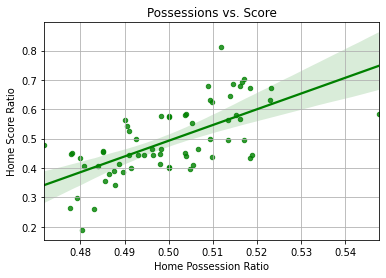

In [104]:
#let's plot this, and regress...
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x = 'Home_poss_ratio', y = 'Home_score_ratio', data = combined, color = 'green', scatter_kws={"s": 20})
plt.xlabel('Home Possession Ratio')
plt.ylabel('Home Score Ratio')
plt.title('Possessions vs. Score')
plt.tick_params(axis="x")
plt.tick_params(axis="y")
plt.grid()
plt.savefig('pvs_regplot_blacklabels.png')

In [105]:
#and run a few more stats for fun
combined['Possession Count Difference'].mean()

6.212121212121212

In [106]:
(combined['Home_poss_count'].mean() + combined['Away_poss_count'].mean())/2

130.74242424242425

In [107]:
(combined['hscore'] - combined['ascore']).abs().mean()

31.666666666666668

In [108]:
(combined['hscore'].mean() + combined['ascore'].mean())/2

80.53030303030303

In [109]:
tw = 0
tl = 0
n = 0
for ind, row in combined.iterrows():
    if row['hscore'] >= row['ascore']:
        tw += row['hscore']
        tl += row['ascore']
        n += 1
    else:
        tw += row['ascore']
        tl += row['hscore']
        n +=1
        
print('Average winner: ' + str(tw/n))
print('Average loser: ' + str(tl/n))


Average winner: 96.36363636363636
Average loser: 64.6969696969697
